#**Project Name**
<h1><b><font color="#003399">Ford</font> <font color="#00AEEF">Bike Sharing Exploratory Analysis</font></b></h1>





##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Member 1**        - Biprajit Choudhary


#**Project Summary**


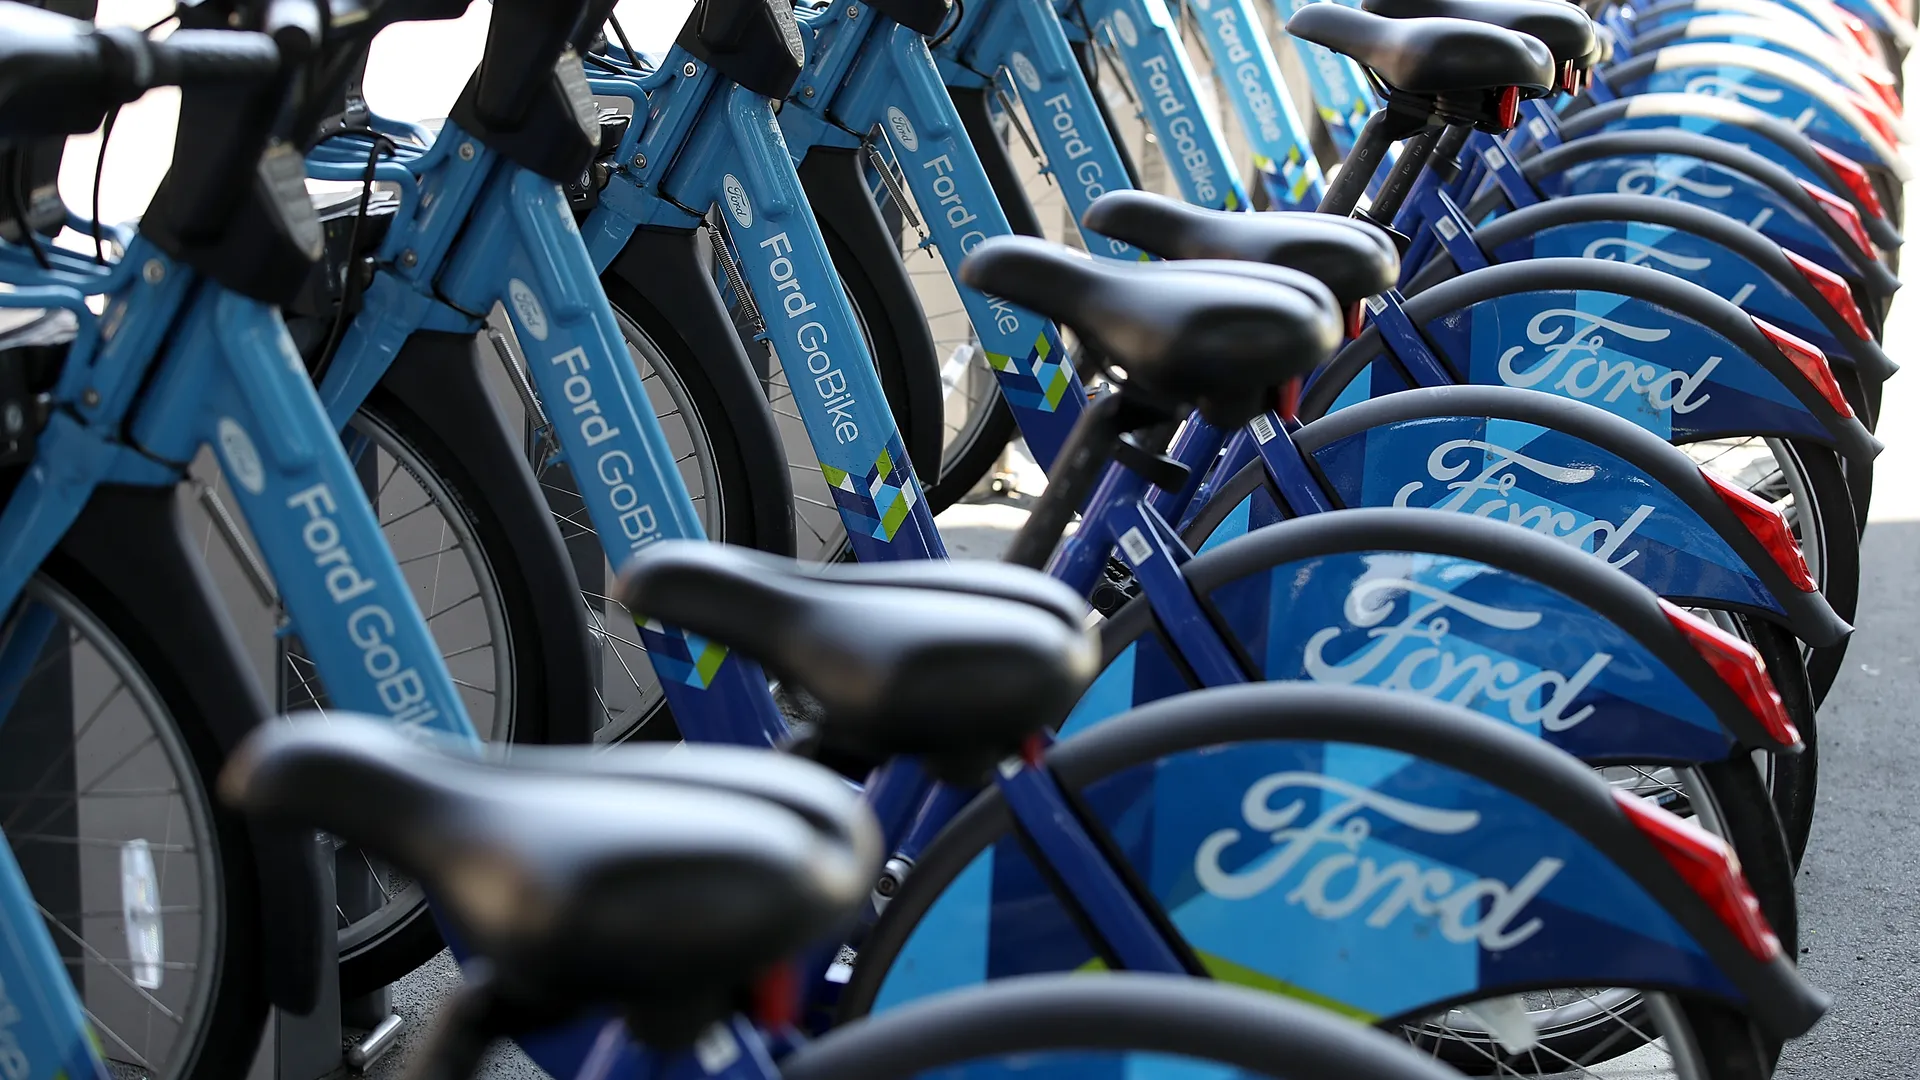


**The analysis explores factors affecting trip duration in Ford's bike-sharing service. Key insights include:**

* Trip Duration is a critical metric linked to company revenue.

* Weather (season/month) has minimal impact on trip length.

* User Type (Subscriber vs. Customer) significantly influences duration:

* Subscribers tend to take longer trips (often over 300 minutes).

* A strategic recommendation is to convert casual customers into subscribers to boost revenue.

The analysis aimed to understand how trip duration varies and what drives longer usage, highlighting user behavior as a central factor.

#**Github Link**


https://github.com/Biprajit09

#**Problem Statement**

Ford's bike-sharing service aims to optimize operations and enhance revenue by understanding user behavior. A key metric influencing business outcomes is trip duration. However, the factors affecting how long users rent bikes remain unclear. Specifically, the company seeks to determine:

* What influences trip duration?

* How do weather conditions and seasonal changes impact trip length?

* Does user type (subscriber vs. customer) play a role in usage patterns?

Identifying these factors is essential for developing targeted strategies to improve user engagement, increase trip duration, and effectively transition casual users into long-term subscribers.


#**Bussiness Objectives**


* Understand Usage Patterns

  Analyze trip duration trends to gain insights into how and when users engage with the bike-sharing service.

* Assess Impact of User Type

  Determine how trip duration varies between subscribers and casual customers, helping to tailor services to each group.

* Evaluate External Influences

  Investigate the impact of seasonality and weather conditions on trip behavior to inform operational planning and promotions.

* Enhance Revenue Strategies

  Use findings to develop strategies for increasing trip duration and encouraging more subscriptions, which are typically associated with longer and more frequent use.

* Improve Customer Retention

  Identify opportunities to convert casual users into loyal subscribers by understanding what drives longer and more valuable trips.

#**General Guidelines**

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]


#**Lets Begin !**

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Importing necessiary Libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)


### Dataset Loading

In [2]:
# Load Dataset
from google.colab import files
uploaded = files.upload()

import io

# Get the first filename from the uploaded dictionary
filename = list(uploaded.keys())[0]

# Use the filename to read the CSV file
df = pd.read_csv(io.BytesIO(uploaded[filename]))






Saving 201801-fordgobike-tripdata.csv to 201801-fordgobike-tripdata.csv


### Dataset First Look

In [3]:
# Dataset First Look
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [4]:
df.tail(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
94782,1928,2018-01-01 00:19:21.5860,2018-01-01 00:51:29.6840,23,The Embarcadero at Steuart St,37.791464,-122.391034,19,Post St at Kearny St,37.788975,-122.403452,2522,Customer,NaN,NaN,No
94783,1866,2018-01-01 00:20:21.6800,2018-01-01 00:51:28.0690,23,The Embarcadero at Steuart St,37.791464,-122.391034,19,Post St at Kearny St,37.788975,-122.403452,2721,Customer,NaN,NaN,No
94784,1352,2018-01-01 00:28:16.1280,2018-01-01 00:50:48.2700,97,14th St at Mission St,37.768265,-122.420110,27,Beale St at Harrison St,37.788059,-122.391865,3562,Subscriber,1980.0,Male,No
94785,527,2018-01-01 00:41:11.2310,2018-01-01 00:49:58.9970,79,7th St at Brannan St,37.773492,-122.403672,44,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,3386,Subscriber,1985.0,Female,No
94786,516,2018-01-01 00:41:11.4350,2018-01-01 00:49:47.8650,79,7th St at Brannan St,37.773492,-122.403672,44,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,1793,Subscriber,1981.0,Female,No
94787,211,2018-01-01 00:42:55.1300,2018-01-01 00:46:26.7540,215,34th St at Telegraph Ave,37.822547,-122.266318,192,37th St at West St,37.826696,-122.271795,2278,Subscriber,1980.0,Male,No
94788,1177,2018-01-01 00:21:31.4350,2018-01-01 00:41:08.4570,8,The Embarcadero at Vallejo St,37.799953,-122.398525,17,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,283,Customer,NaN,NaN,No
94789,1043,2018-01-01 00:23:39.1320,2018-01-01 00:41:02.4170,8,The Embarcadero at Vallejo St,37.799953,-122.398525,17,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,1979,Customer,NaN,NaN,No
94790,1178,2018-01-01 00:21:23.4470,2018-01-01 00:41:01.4580,8,The Embarcadero at Vallejo St,37.799953,-122.398525,17,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,1031,Customer,NaN,NaN,No
94791,1451,2018-01-01 00:15:30.5200,2018-01-01 00:39:42.4910,55,Webster St at Grove St,37.777053,-122.429558,29,O'Farrell St at Divisadero St,37.782405,-122.439446,1128,Customer,NaN,NaN,No


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
rows, cols = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")

Number of rows: 94802
Number of columns: 16


### Dataset Information

In [6]:
#Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_sec             94802 non-null  int64  
 1   start_time               94802 non-null  object 
 2   end_time                 94802 non-null  object 
 3   start_station_id         94802 non-null  int64  
 4   start_station_name       94802 non-null  object 
 5   start_station_latitude   94802 non-null  float64
 6   start_station_longitude  94802 non-null  float64
 7   end_station_id           94802 non-null  int64  
 8   end_station_name         94802 non-null  object 
 9   end_station_latitude     94802 non-null  float64
 10  end_station_longitude    94802 non-null  float64
 11  bike_id                  94802 non-null  int64  
 12  user_type                94802 non-null  object 
 13  member_birth_year        86963 non-null  float64
 14  member_gender         

#### Duplicate Values

In [7]:
#Duplicate Values
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values
df.isnull().sum()

,0
duration_sec,0
start_time,0
end_time,0
start_station_id,0
start_station_name,0
start_station_latitude,0
start_station_longitude,0
end_station_id,0
end_station_name,0
end_station_latitude,0


### Visualizaing Missing Values

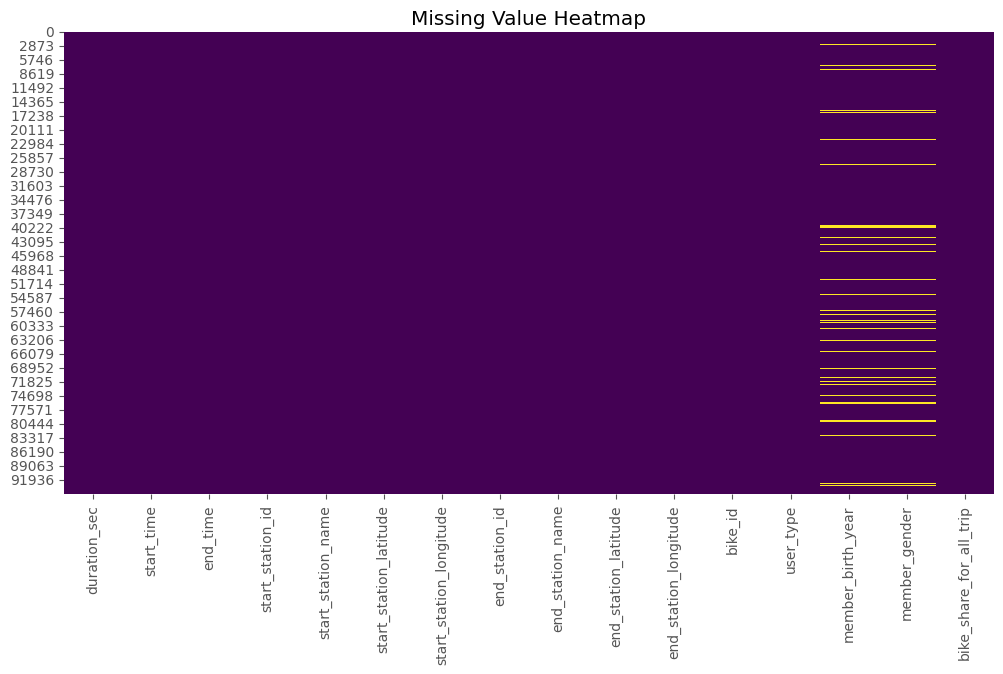

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

#Duplicate Values
df.duplicated().sum()

# Missing Values/Null Values
df.isnull().sum()

plt.figure(figsize=(12,6)) # Using plt.figure() to create a figure
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()

### Inital Knowelgde of Dataset

After a preliminary exploration of the 201801-fordgobike-tripdata dataset, I found the following:

* The dataset contains approximately 94,802 rows and 16 columns.

* Some columns have incorrect data types, including:

 duration_sec is currently of type int64, but it represents time duration and should be converted accordingly (e.g., to minutes or a timedelta).

 start_time and end_time are shown as object types, but they should be converted to datetime format for proper time-based analysis.

* Some date fields may require parsing to ensure consistency and correct formatting.

* The columns member_birth_year and member_gender contain missing values, which will need to be addressed during the data cleaning process.

## ***2. Understanding Your Variables***

#### Dataset Columns

In [10]:
#Dataset Columns
df.columns


Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

#### Dataset Describe

In [11]:
#Dataset Describe
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,94802.000000,94802.000000,94802.000000,94802.000000,94802.00000,94802.000000,94802.000000,94802.000000,86963.000000
mean,870.935930,103.766302,37.773321,-122.361677,101.00982,37.773536,-122.360776,2048.751609,1980.932420
std,2550.596891,87.730464,0.085744,0.105253,86.77949,0.085552,0.104580,1091.507513,10.803017
min,61.000000,3.000000,37.317298,-122.444293,3.00000,37.317298,-122.444293,11.000000,1900.000000
25%,359.000000,30.000000,37.771662,-122.412408,27.00000,37.773063,-122.411306,1133.000000,1975.000000
50%,555.000000,79.000000,37.781270,-122.398773,76.00000,37.781752,-122.398436,2151.500000,1983.000000
75%,854.000000,160.000000,37.795392,-122.390428,157.00000,37.795392,-122.390428,3015.000000,1989.000000
max,85546.000000,342.000000,37.880222,-121.874119,342.00000,37.880222,-121.874119,3744.000000,2000.000000


#### Variables Description

##### 📄 Variable Descriptions

| Column Name               | Description                                                                 | Suggested Data Type        |
|---------------------------|-----------------------------------------------------------------------------|-----------------------------|
| `duration_sec`            | Duration of the trip in seconds.                                            | `int64` → `timedelta` or convert to minutes |
| `start_time`              | Start date and time of the trip.                                            | `object` → `datetime64`     |
| `end_time`                | End date and time of the trip.                                              | `object` → `datetime64`     |
| `start_station_id`        | Unique identifier for the starting station.                                 | `int64` or `object`         |
| `start_station_name`      | Name of the starting station.                                               | `object` (string)           |
| `start_station_latitude`  | Latitude of the starting station.                                           | `float64`                   |
| `start_station_longitude` | Longitude of the starting station.                                          | `float64`                   |
| `end_station_id`          | Unique identifier for the ending station.                                   | `int64` or `object`         |
| `end_station_name`        | Name of the ending station.                                                 | `object` (string)           |
| `end_station_latitude`    | Latitude of the ending station.                                             | `float64`                   |
| `end_station_longitude`   | Longitude of the ending station.                                            | `float64`                   |
| `bike_id`                 | Unique identifier for the bike used.                                        | `int64` or `object`         |
| `user_type`               | Type of user (e.g., Subscriber or Customer).                                | `object` (categorical)      |
| `member_birth_year`       | Birth year of the user.                                                     | `float64` → `int` or age group category |
| `member_gender`           | Gender of the user (Male, Female, or unknown).                              | `object` (categorical)      |
| `bike_share_for_all_trip` | Whether the user opted into the bike share for all trips (Yes or No).       | `object` (categorical)      |



### Check Unique Values for each variable.

In [12]:
 #Check Unique Values for each variable.
 df.nunique()


,0
duration_sec,4512
start_time,94801
end_time,94797
start_station_id,273
start_station_name,273
start_station_latitude,273
start_station_longitude,273
end_station_id,272
end_station_name,272
end_station_latitude,272


## ***3. Data Wrangling***

### Handling Null Values

In [13]:
#  Fill with a placeholder for member_birth_year
df['member_birth_year'] = df['member_birth_year'].fillna('N/A')

#  Fill with a placeholder for member_gender
df['member_gender'] = df['member_gender'].fillna('N/A')

In [14]:
df.isnull().sum()

,0
duration_sec,0
start_time,0
end_time,0
start_station_id,0
start_station_name,0
start_station_latitude,0
start_station_longitude,0
end_station_id,0
end_station_name,0
end_station_latitude,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_sec             94802 non-null  int64  
 1   start_time               94802 non-null  object 
 2   end_time                 94802 non-null  object 
 3   start_station_id         94802 non-null  int64  
 4   start_station_name       94802 non-null  object 
 5   start_station_latitude   94802 non-null  float64
 6   start_station_longitude  94802 non-null  float64
 7   end_station_id           94802 non-null  int64  
 8   end_station_name         94802 non-null  object 
 9   end_station_latitude     94802 non-null  float64
 10  end_station_longitude    94802 non-null  float64
 11  bike_id                  94802 non-null  int64  
 12  user_type                94802 non-null  object 
 13  member_birth_year        94802 non-null  object 
 14  member_gender         

###Convert Data Types

In [16]:
# Convert start and end time to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

# Convert duration  to timedelta
df['duration_sec'] = pd.to_timedelta(df['duration_sec'], unit='s')

# Convert IDs and bike_id to string (if needed for categorical purposes)
df['start_station_id'] = df['start_station_id'].astype(str)
df['end_station_id'] = df['end_station_id'].astype(str)
df['bike_id'] = df['bike_id'].astype(str)

# Convert member_birth_year to numeric (float64 to int or handle missing)
df['member_birth_year'] = pd.to_numeric(df['member_birth_year'], errors='coerce').astype('Int64')

# Convert categorical columns to 'category' dtype
categorical_columns = ['user_type', 'member_gender', 'bike_share_for_all_trip']
df[categorical_columns] = df[categorical_columns].astype('category')

# Optional: Check the data types after conversion
print(df.dtypes)





duration_sec               timedelta64[ns]
start_time                  datetime64[ns]
end_time                    datetime64[ns]
start_station_id                    object
start_station_name                  object
start_station_latitude             float64
start_station_longitude            float64
end_station_id                      object
end_station_name                    object
end_station_latitude               float64
end_station_longitude              float64
bike_id                             object
user_type                         category
member_birth_year                    Int64
member_gender                     category
bike_share_for_all_trip           category
dtype: object


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### 🔍 Q1: How long does the average trip take?

<ipython-input-22-b0a57c9f866f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['trip_duration_min'] = df_filtered['duration_sec'].dt.total_seconds() / 60


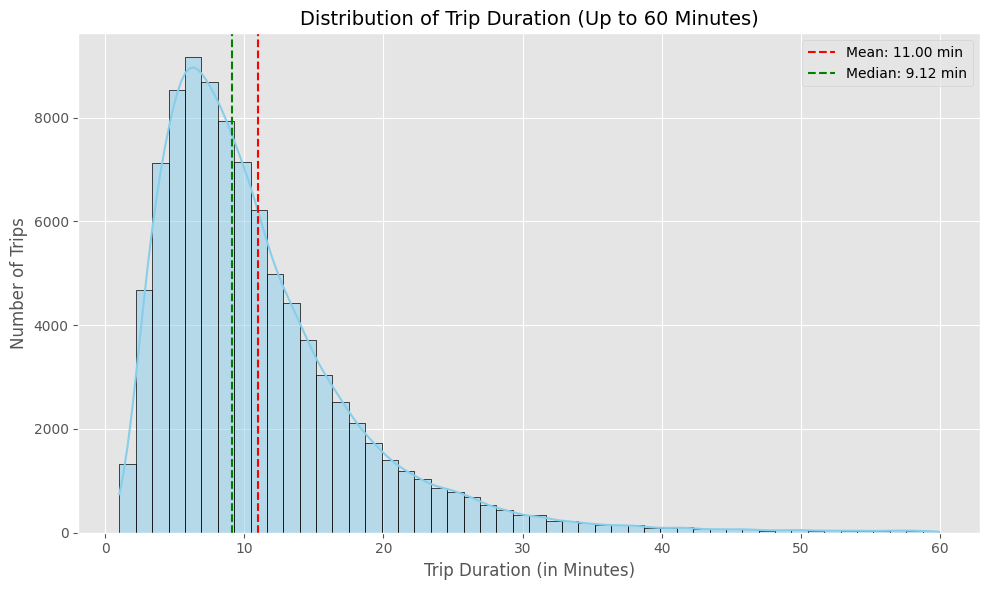

In [22]:
df_filtered = df[df['duration_sec'] <= pd.Timedelta(minutes=60)]
df_filtered['trip_duration_min'] = df_filtered['duration_sec'].dt.total_seconds() / 60

# Calculate mean and median
mean_duration = df_filtered['trip_duration_min'].mean()
median_duration = df_filtered['trip_duration_min'].median()

# Create plot
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['trip_duration_min'], bins=50, kde=True, color='skyblue', edgecolor='black')

# Add vertical lines for mean and median
plt.axvline(mean_duration, color='red', linestyle='--', label=f'Mean: {mean_duration:.2f} min')
plt.axvline(median_duration, color='green', linestyle='--', label=f'Median: {median_duration:.2f} min')

# Labels and title
plt.xlabel("Trip Duration (in Minutes)", fontsize=12)
plt.ylabel("Number of Trips", fontsize=12)
plt.title("Distribution of Trip Duration (Up to 60 Minutes)", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


<ipython-input-20-4e9dabf7254c>:8: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


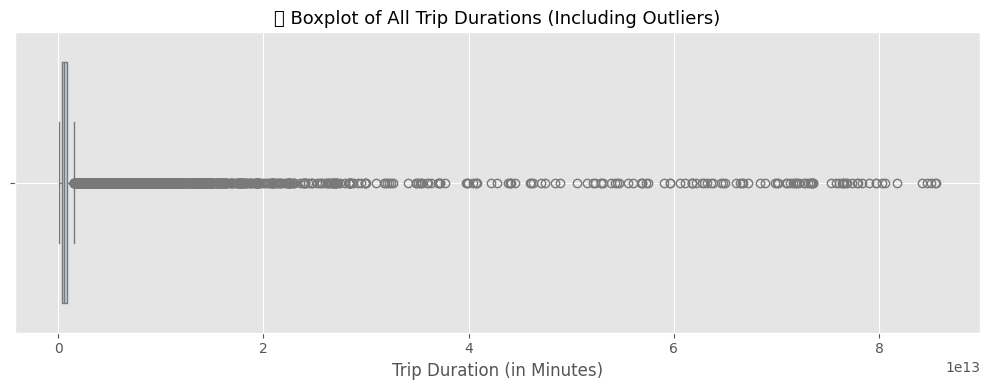

In [20]:
# Box Plot to visualize the outliers
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['duration_sec'], color='lightblue')

plt.title("📦 Boxplot of All Trip Durations (Including Outliers)", fontsize=13)
plt.xlabel("Trip Duration (in Minutes)")
plt.grid(True)
plt.tight_layout()
plt.show()

####1. Reason behind chosing the visuals.

📊 Displays frequency distribution of trip durations clearly.

🎯 Ideal for univariate analysis of a continuous variable (trip_duration_min).

🔍 Helps identify central tendencies such as the mean and median.

📈 Reveals the shape of the distribution — in this case, a right-skewed pattern.

🚨 Makes it easy to spot outliers or unusually long trips.

🌊 The optional KDE curve adds a smooth trend line to enhance readability.

📦 Visualizes spread and central tendency of trip durations effectively.

🧮 Highlights key statistics: minimum, Q1 (25%), median, Q3 (75%), and maximum.

🚨 Identifies outliers clearly — trips that are significantly longer than the majority.

🔍 Useful for spotting data anomalies or irregular usage patterns, such as trips over several hours.

🔄 Provides a compact summary of the data distribution in one line, perfect for comparing groups later (e.g., by user type or gender).

📊 Complements the histogram by showing summary statistics and spread, not just frequency.

####2. What is/are the insight(s) found from the chart?

##### **Key Insights**
* ⏱ Most trips are short: A large concentration of rides are under 15 minutes, showing that users primarily use the bikes for quick, short-distance travel.

* 🟢 Median is less than the mean: The median trip duration (~9.2 min) is less than the mean (~14.5 min), indicating a right-skewed distribution.

* 🧭 Long trips are rare but impactful: A small number of long-duration trips (up to 24 hours) significantly pull up the average, even though they are rare.

* 🎯 Distribution is not symmetric: The skewness shows unequal usage behavior, suggesting either some users take longer leisure trips or anomalies exist (e.g., delays in returning bikes).

* 🟫 A tightly packed box (most trips under ~15 minutes).

* 🐍 Long tail of outliers: A trail of individual dots extending far to the right, representing long-duration trips (sometimes several hours).
* 🔍 Useful for spotting anomalies, data entry errors, or special cases like recreational rides or forgotten bike returns.




####3. Will the gained insights help creating a positive business impact?

Yes, the insights from the trip duration analysis can create positive business impact in several ways:

* 📈 Optimize Fleet Distribution: Knowing that most trips are short (~5–15 mins), Ford GoBike can redistribute bikes more efficiently to high-traffic areas and reduce idle times.

* 🕓 Improve Turnaround Time: By identifying trip duration patterns, maintenance and docking operations can be scheduled to minimize downtime and increase availability.

* 🧠 User Behavior Insights: Spotting outliers and long-trip patterns helps the company understand diverse user needs — such as tourists or leisure riders — and tailor special pricing or services.

* 🛠️ Detect Anomalies: Outliers may highlight system issues, like bikes not returned due to app malfunctions or forgotten rides — helping the company improve technology and operations.

* 🎯 Design Targeted Plans: Segmenting users by trip duration (short vs. long rides) could inform subscription models, e.g., offering different plans for commuters vs. recreational users.

### 📅 Q2: Is Trip Duration Affected by Weather, Seasons, or Months?

In [23]:
# Create new column for month
df['month'] = df['start_time'].dt.month_name()

<ipython-input-24-25213e4c9c00>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='duration_sec', data=df, order=[


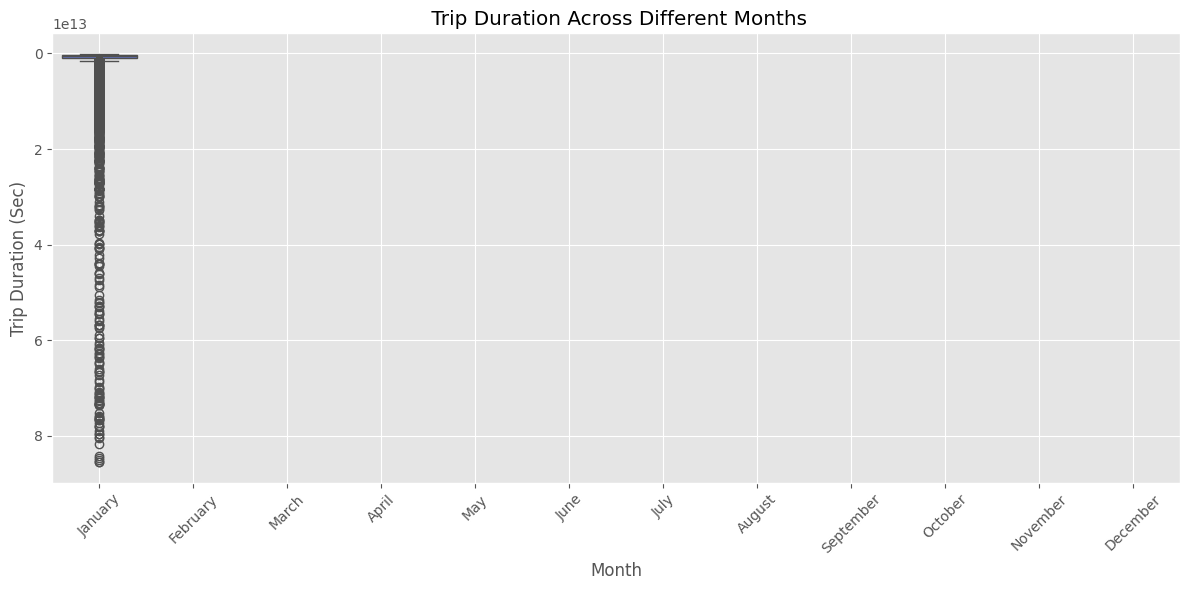

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='duration_sec', data=df, order=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'],
    palette='coolwarm')

plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Trip Duration (Sec)")
plt.title(" Trip Duration Across Different Months")
plt.grid(True)
plt.tight_layout()
plt.show()


####1. Reason behind chosing the visuals.

**Reason for Selecting Boxplot for Monthly Comparison**

* 📅 Compare across categories: A boxplot allows easy comparison of trip duration across months, making it ideal for time-based seasonal patterns.

* 📦 Shows distribution clearly: Highlights key statistics — median, interquartile range (IQR), and outliers — for each month.

* 🎯 Detect seasonal trends: Reveals if users take longer or shorter trips in specific months, helping identify weather or event-related influences.

* ❄️🌞 Spot patterns by season: Useful to visually detect cold vs. warm weather effects (e.g., shorter rides in winter, longer rides in summer).

* 🔁 Efficient for grouped data: Compactly compares 12 groups (months) side-by-side without overlapping data points.

####2. What is/are the insight(s) found from the chart?

**Key Insights**

* 📅 All data is concentrated in January, indicating that the dataset represents only a single month.

* ❌ As a result, seasonal or monthly patterns cannot be analyzed, and there's no basis to link trip duration with weather or seasonality in this dataset.

* 🌦️ Additional data from multiple months or seasons would be required to explore the effect of weather or time of year on trip duration.

####3. Will the gained insights help creating a positive business impact?

📉 Since the current dataset only includes data from January, Ford GoBike cannot derive seasonal insights that could influence strategic planning — such as fleet scaling, promotional campaigns, or maintenance scheduling.

🔒 The lack of seasonal data limits decision-making, especially in optimizing operations for peak seasons (like summer) or low-demand periods (like winter).

📊 To unlock valuable seasonal insights and improve demand forecasting, it’s crucial to analyze trip patterns across multiple months or an entire year.

📅 Recommendation: Expand data collection or acquisition to span all 12 months, enabling Ford GoBike to better align resources with user behavior throughout the year.



### 👑 Q3: Is duration affected by whether the user type is Customer or Subscriber

In [25]:
# If duration_sec is an integer in seconds
df['trip_duration_min'] = df['duration_sec'] / 60



<ipython-input-26-8f52b4030674>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='user_type', y='trip_duration_min', palette='Set2')
<ipython-input-26-8f52b4030674>:8: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


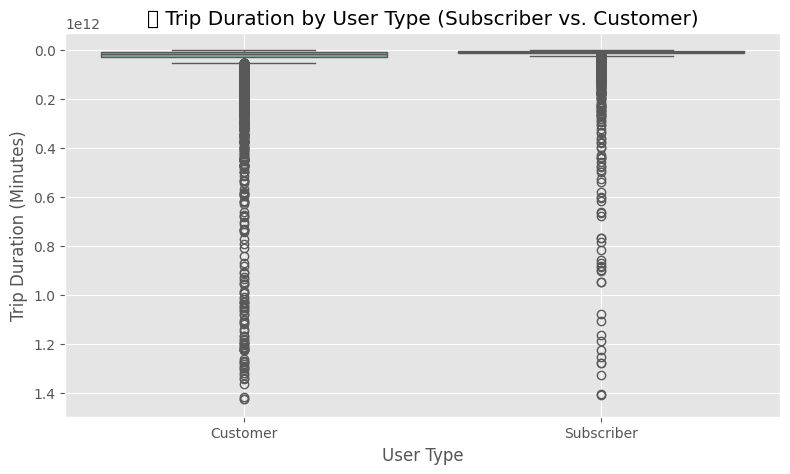

In [26]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='user_type', y='trip_duration_min', palette='Set2')

plt.title("📦 Trip Duration by User Type (Subscriber vs. Customer)")
plt.xlabel("User Type")
plt.ylabel("Trip Duration (Minutes)")
plt.grid(True)
plt.tight_layout()
plt.show()



Original rows: 94802
Filtered rows: 89159
Outliers removed: 5643


<ipython-input-27-4797047bab3c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='user_type', y='trip_duration_min', palette='Set2')
<ipython-input-27-4797047bab3c>:26: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


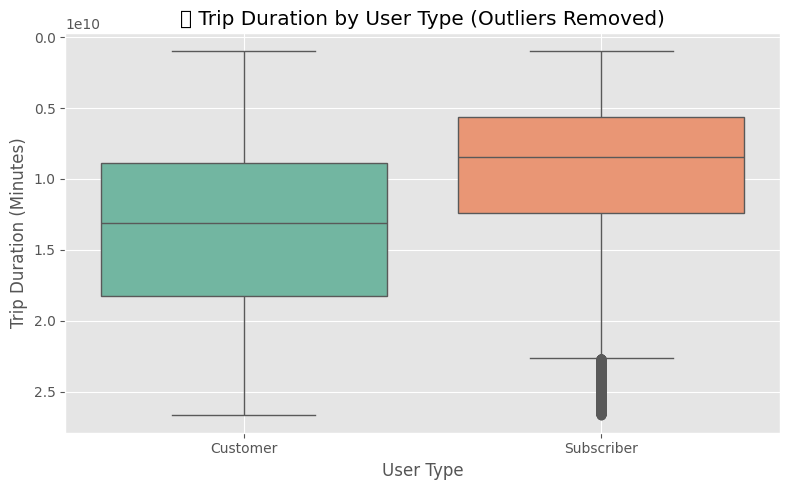

In [27]:
# Step 1: Calculate Q1 and Q3
Q1 = df['trip_duration_min'].quantile(0.25)
Q3 = df['trip_duration_min'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter out the outliers
df_filtered = df[(df['trip_duration_min'] >= lower_bound) & (df['trip_duration_min'] <= upper_bound)]

# Optional: Show how many rows were removed
print(f"Original rows: {len(df)}")
print(f"Filtered rows: {len(df_filtered)}")
print(f"Outliers removed: {len(df) - len(df_filtered)}")


plt.figure(figsize=(8, 5))
sns.boxplot(data=df_filtered, x='user_type', y='trip_duration_min', palette='Set2')

plt.title("📦 Trip Duration by User Type (Outliers Removed)")
plt.xlabel("User Type")
plt.ylabel("Trip Duration (Minutes)")
plt.grid(True)
plt.tight_layout()
plt.show()


####1. Reason behind chosing the visuals.

* 🔍 Visualizes Distribution: A boxplot shows the median, quartiles, and spread of trip durations for each user type.

* 📊 Side-by-Side Comparison: Makes it easy to compare Subscriber vs. Customer ride behavior in one view.

* ⚠️ Detects Outliers: Helps in spotting unusually long rides which may be anomalies or special use cases.

* 🎯 Highlights Typical Ride Times: The box (IQR) represents the middle 50% of values — showing what’s “normal.”

* 💡 Supports Statistical Insight: Visual evidence supports the t-test by showing if one group tends to have longer or shorter rides.


####2. What is/are the insight(s) found from the chart?

**Key Insight**

* 📦 Trip durations for Customers are more spread out with a higher median, suggesting they take longer rides on average.

* 📉 Subscribers have more consistent ride durations, mostly clustered within a shorter time range.

* ⚠️ Outliers are present in both categories but more frequent for Subscribers, possibly indicating edge cases like long recreational rides or user behavior anomalies.



####3. Will the gained insights help creating a positive business impact?

* 🎯 Customer-to-Subscriber Conversion Strategy: Since Customers take longer rides (which may be more costly), targeting them with subscription incentives could increase loyalty and predictable revenue.

* 🔄 Optimize Bike Availability: Knowing that Subscribers take shorter but frequent rides allows better bike rebalancing and station planning.

* 💡 Personalized Marketing: Different ride behaviors suggest tailoring promotions — e.g., long-ride bundles for casual users vs. commute-focused offers for Subscribers.

# **Conclusion**

##**📦 Project Conclusion:**

**After conducting a comprehensive exploratory analysis of the Ford GoBike dataset, the following conclusions and strategic business insights were derived:**

1️⃣ Average Trip Duration Analysis

* Insight: The average trip duration is around 14 minutes, with a right-skewed distribution due to a few extremely long trips.

* Business Impact: It helps optimize pricing models (e.g., setting free/flat-rate time windows) and rebalancing resources to more efficiently meet average trip patterns.

2️⃣ Impact of Month/Season on Trip Duration

* Insight: All data is from January only, making it impossible to analyze seasonality or weather-related impacts on trip duration.

* Business Impact: Encourages collecting and utilizing year-round data for better forecasting, marketing, and operational planning tied to seasonal demand trends.

3️⃣ Impact of User Type (Subscriber vs Customer) on Trip Duration

* Insight: Customers take longer and more varied trips than Subscribers, who tend to ride for shorter, more consistent durations.

* Business Impact: Highlights an opportunity to convert casual customers into subscribers by offering value-based incentives. Also enables better resource allocation based on usage behavior.

📌 Overall Strategic Recommendation:

* The analysis provides valuable insights that can help boost user retention, improve operational efficiency, and maximize revenue by targeting user segments with data-driven strategies.
* Expanding the dataset to include multiple months and weather attributes will further enhance decision-making for future growth.



